## 6. 數據分析專案 Data Analysis Project – Demo1

### Import data
Financial data analysis is one of the most frequently studied. Through learning the
work flow, we can understand the time series topic as well. Today we explore basic
technical analysis.

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from decimal import ROUND_HALF_UP, Decimal
from tqdm import tqdm
import scipy.stats as scs
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = yf.download("^HSI", start="1987-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


### Cleaning and trimming
We drop these 3 unnecessary columns in this study, but it does mean they are
useless in other.

In [11]:
data = df_raw.copy().drop(columns=['Adj Close','Volume']).dropna()
data.sample(3)

,Open,High,Low,Close
Date,,,,
1991-07-15,3915.000000,3958.000000,3915.000000,3945.000000
1996-07-29,10722.500000,10752.700195,10623.900391,10651.799805
2017-12-19,29193.740234,29339.109375,29144.169922,29253.660156


### Add features
In most of time, the original dataset might be simple and under 10 columns. We can
add additional relevant columns, i.e. RSI, Stochastics, for further study and take into
account for machine learning.

In [12]:
def add_features(feats):
    for i in [20,60]:
        feats[f"NA_{i}"] = (feats["Close"].rolling(i).mean())
    
    feats['simple_rtn'] = feats.Close.pct_change()
    feats['log_rtn'] = np.log(feats.Close/feats.Close.shift(1))
    feats['volatility_20'] = (np.log(feats["Close"]).diff().rolling(20).std())
    feats['log_rtn_20'] = np.log(feats.Close/feats.Close.shift(20))
    return feats

data = add_features(data).dropna()

### Text

#### Moving Average

The moving average is a concept for analysing the trend in certain period. Since
daily or weekly changes could be fuzzy for decision making.
Moving average also apply to financial accounting, i.e. forecasting sales and cash
flow.
In decades, investors use multiple moving average as well as the mean reversion
strategy, to forecast stock market trend.
In Pandas, DF.rolling provides rolling window calculation.
data["MA_20"] = data["Close"].rolling(20).mean()
This script is to calculate 20 previous closing’s average.

#### Simple return and log return

Simple returns: They aggregate over assets; the simple return of a portfolio is the
weighted sum of the returns of the individual assets in the portfolio. Simple returns
are defined as:
$$
R_t = (P_t-P_{t-1})/P_{t-1} = P_t/P_{t-1}-1
$$
data['simple_rtn'] = data.Close.pct_change()   

Log returns: They aggregate over time; it is easier to understand with the help of an
example—the log return for a given month is the sum of the log returns of the days
within that month. Log returns are defined as:
$$
r_t = log(P_t/P_{t-1}) = log(P_t)-log(P_{t-1})
$$
data['log_rtn'] = np.log(data.Close/ data.Close.shift(1))

The difference between simple and log returns for daily/intraday data will be very
small, however, the general rule is that log returns are smaller in value than simple
returns. (Simple Return made people happy, as it increase more and drop less. But it
didn’t reflect the principal value return in a glance. )
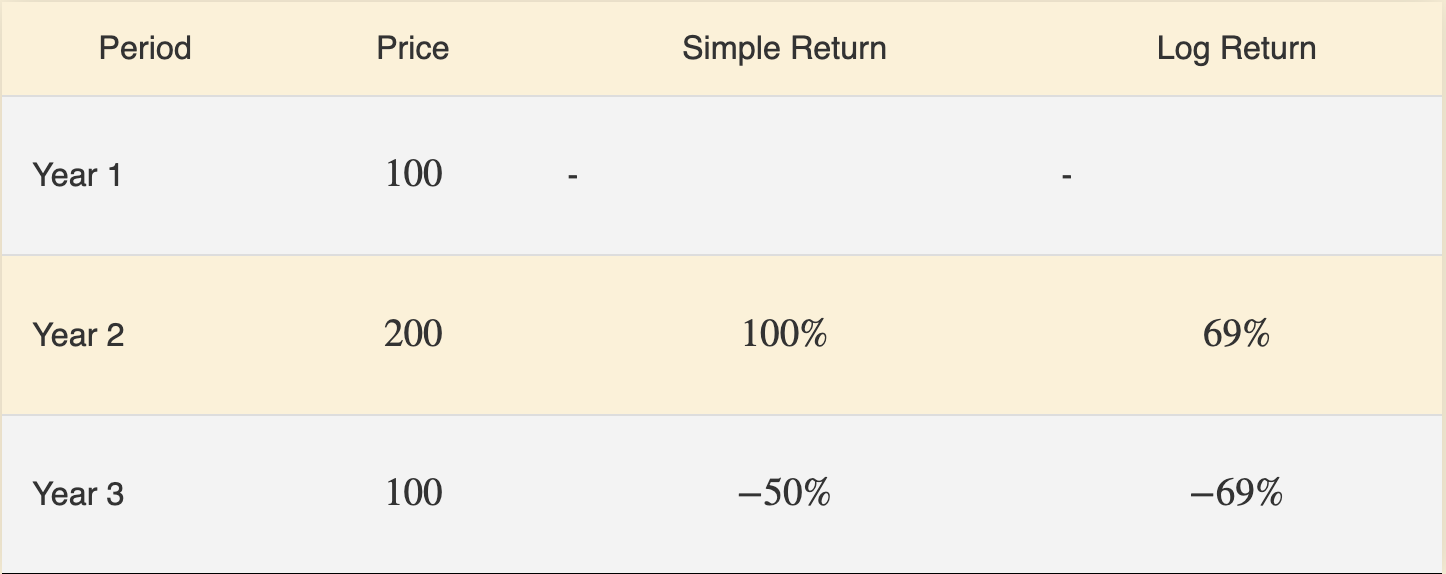

#### Measuring risk

Which asset do you
think it is more risky?
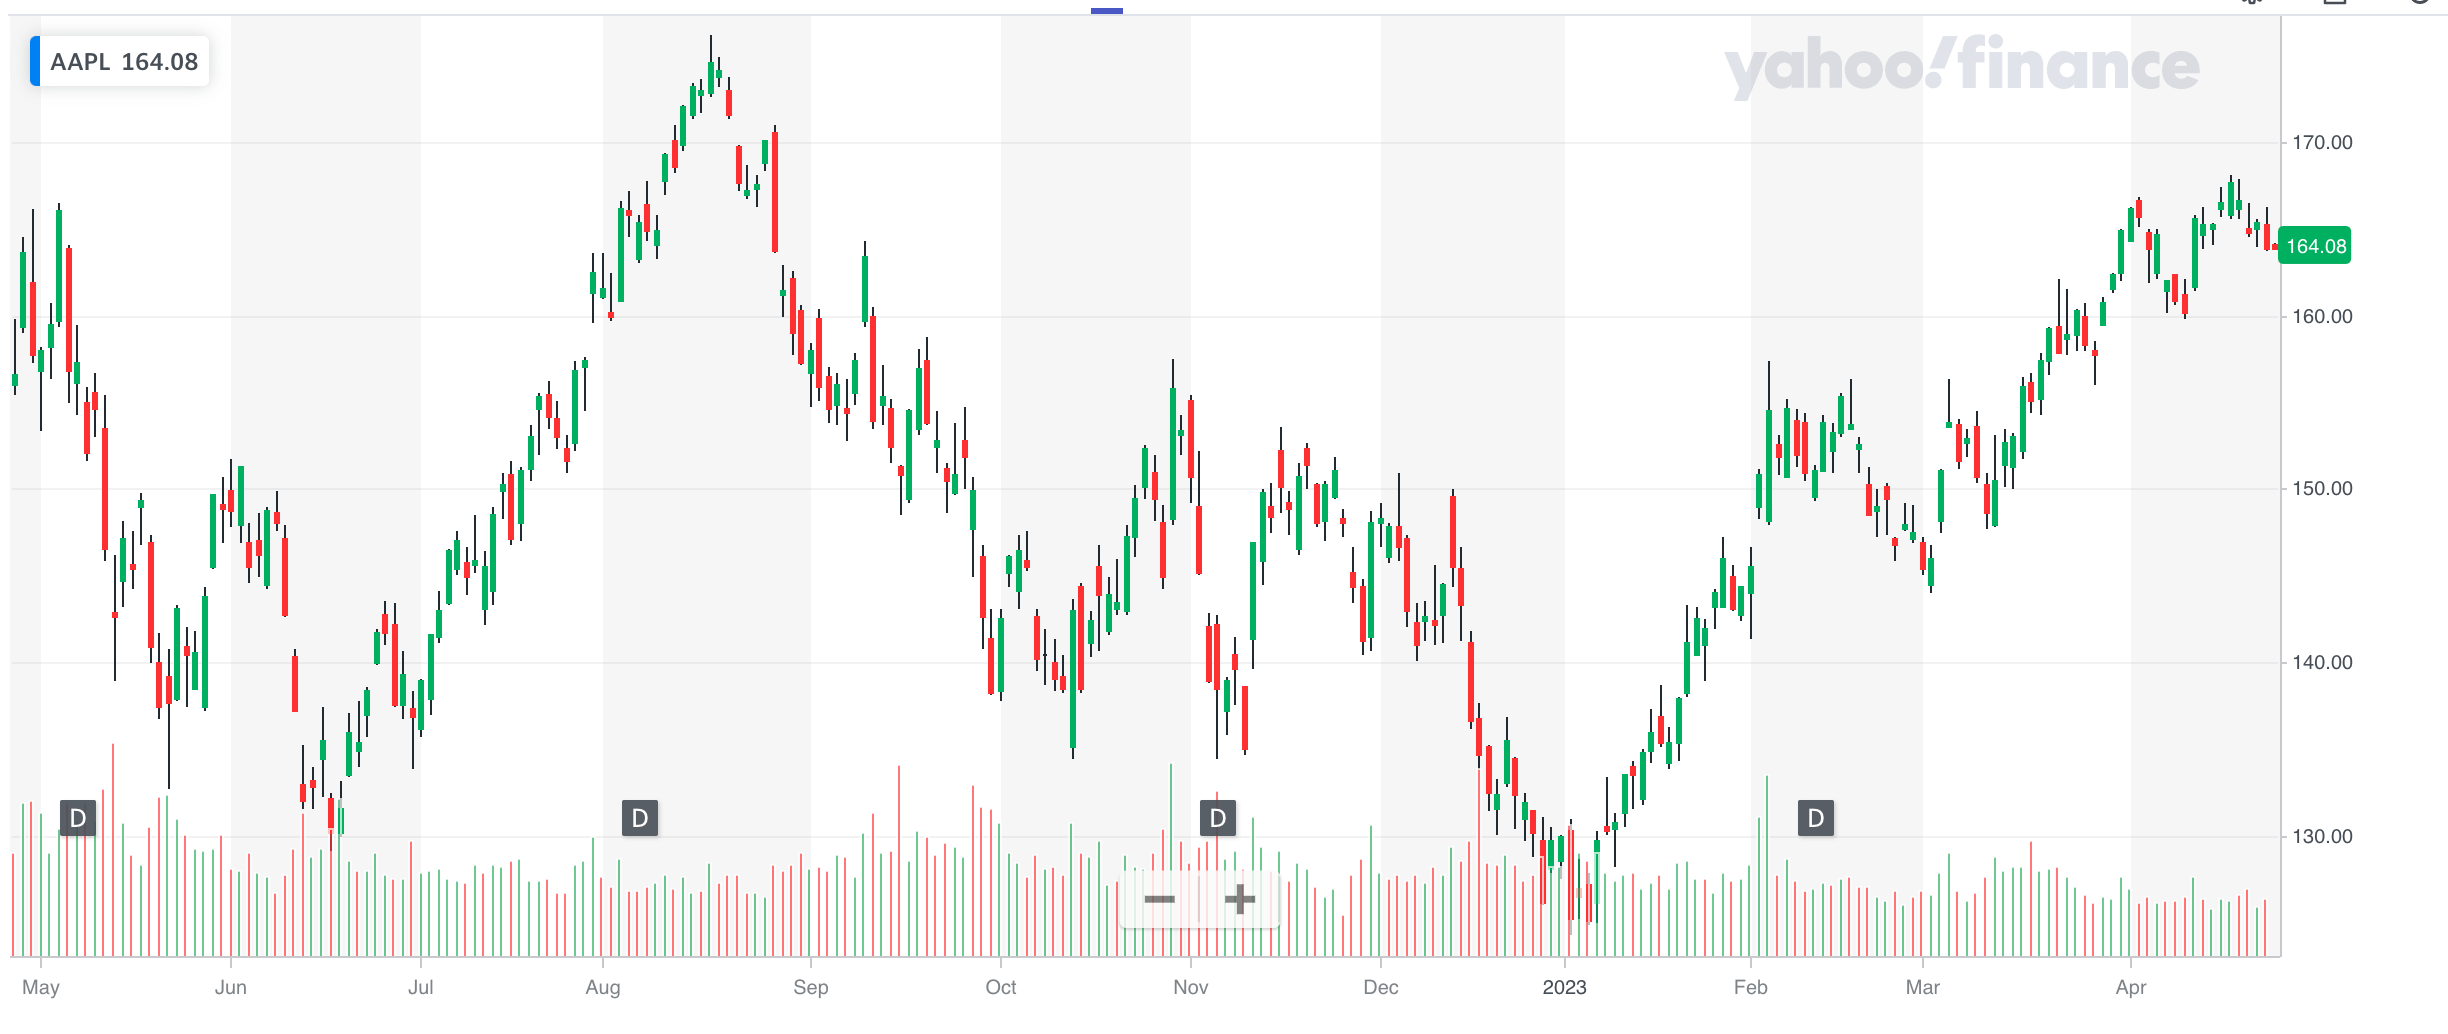
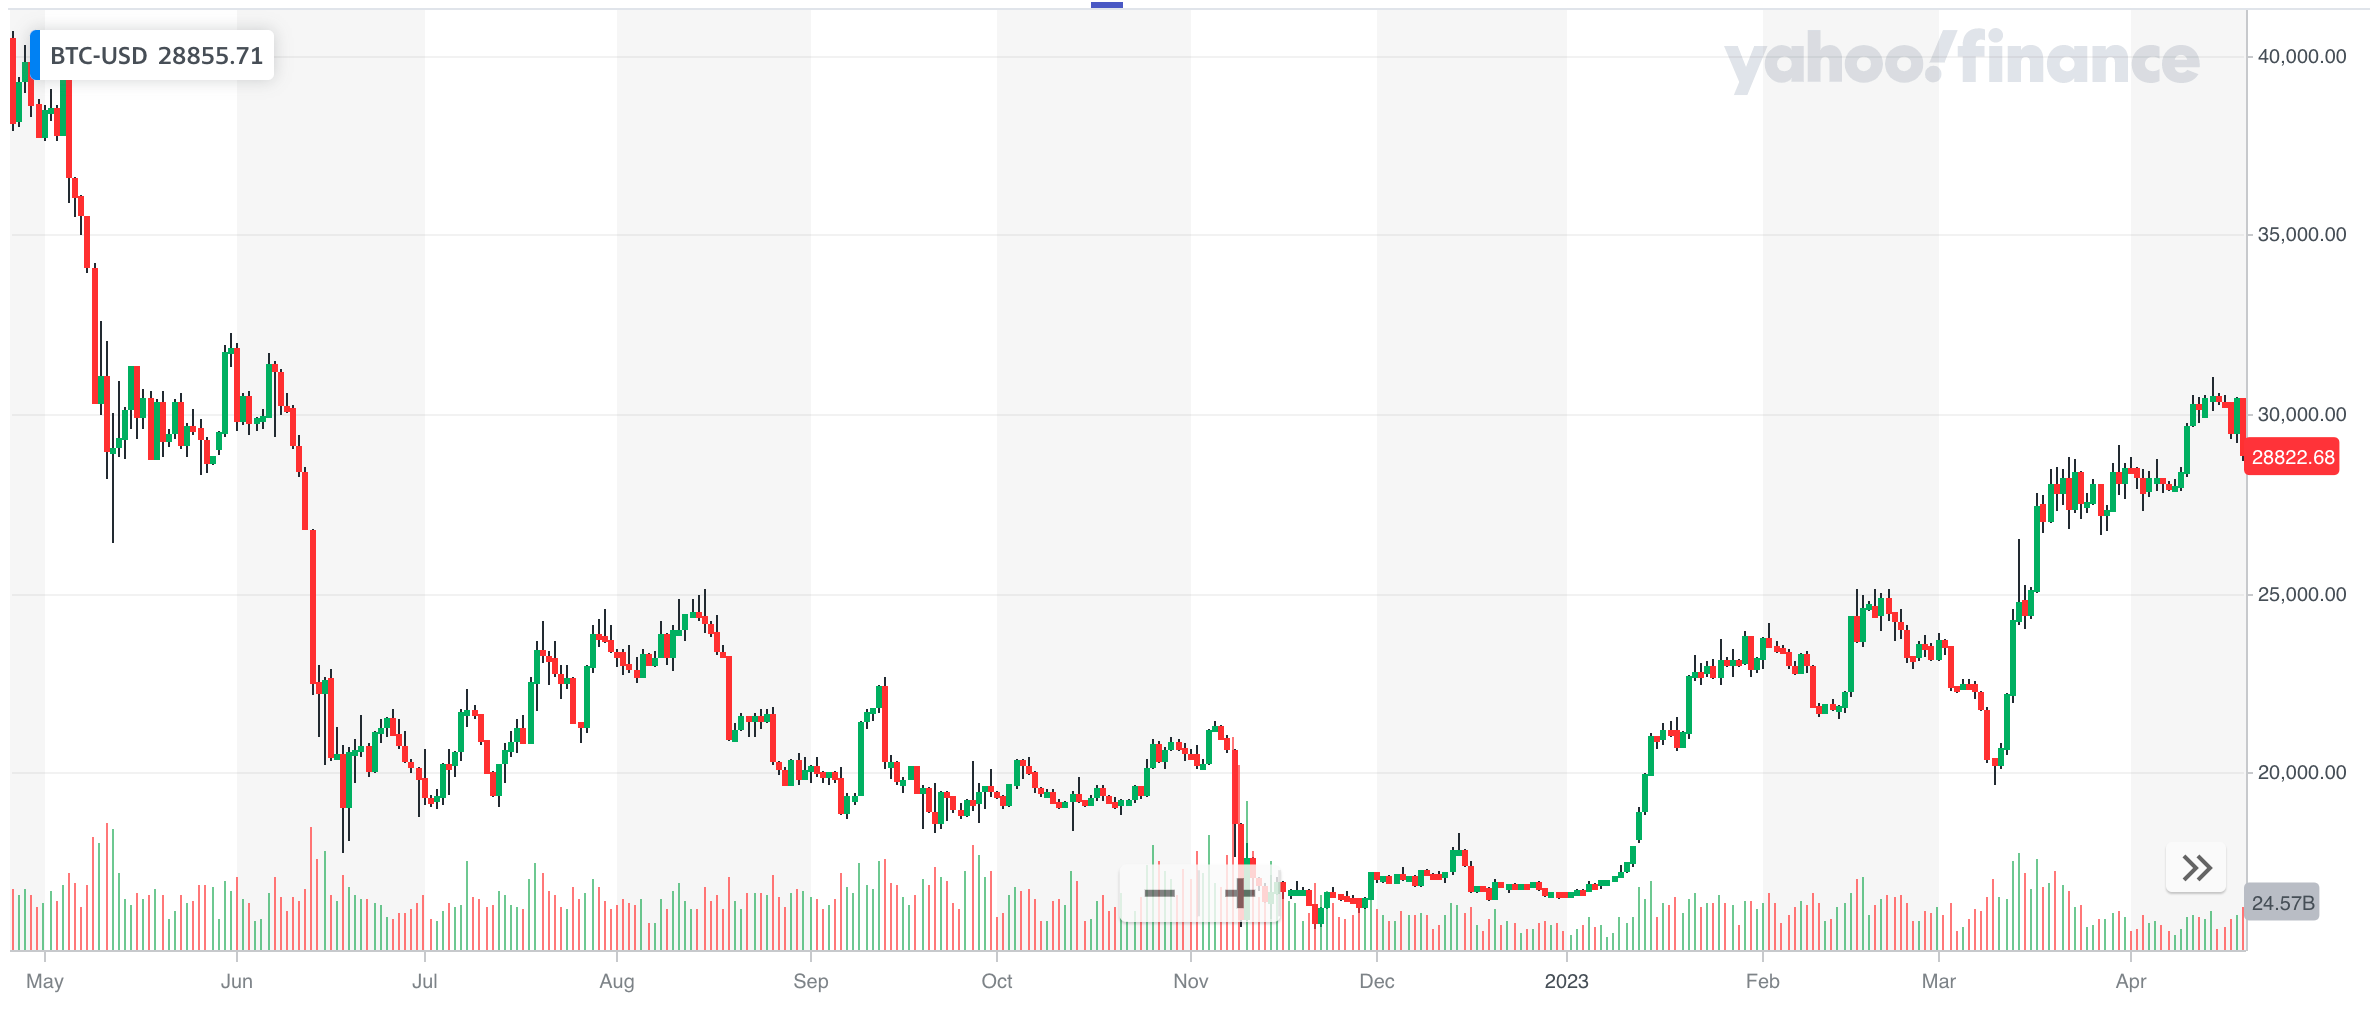

The simplest way to measure asset risk is by measuring its Standard Deviation or
volatility. Same idea applies to national GDP, company monthly sales, foreign
exchange rate, etc. Imagine that a currency with huge fluctuation, will you consider
to trade and have business with its country?
20 days volatility
data["volatility_20"] = (np.log(data["Close"]).diff().rolling(20).std())
20 days log return
data['log_rtn_20'] = np.log(data.Close/feats.Close.shift(20))

We now have a DF for further analysis.

In [13]:
data

,Open,High,Low,Close,NA_20,NA_60,simple_rtn,log_rtn,volatility_20,log_rtn_20
Date,,,,,,,,,,
1987-03-30,2774.899902,2774.899902,2774.899902,2774.899902,2778.260010,2698.976664,-0.008504,-0.008540,0.017323,-0.042129
1987-03-31,2713.800049,2713.800049,2713.800049,2713.800049,2766.995007,2701.871663,-0.022019,-0.022265,0.017369,-0.079754
1987-04-01,2695.899902,2695.899902,2695.899902,2695.899902,2757.245007,2704.263330,-0.006596,-0.006618,0.017132,-0.069836
1987-04-02,2709.399902,2709.399902,2709.399902,2709.399902,2752.795007,2706.354997,0.005008,0.004995,0.015787,-0.032321
1987-04-03,2680.000000,2680.000000,2680.000000,2680.000000,2746.865002,2707.569995,-0.010851,-0.010910,0.015916,-0.043303
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,19537.449219,19735.000000,19475.679688,19679.220703,19052.523438,17491.363623,0.027073,0.026713,0.022045,0.108210
2022-12-23,19382.230469,19686.769531,19380.470703,19593.060547,19153.497461,17531.816813,-0.004378,-0.004388,0.022031,0.108779
2022-12-28,19787.939453,20099.769531,19787.939453,19898.910156,19283.545996,17576.418148,0.015610,0.015490,0.021549,0.140078


Take a glance at the DF basic stats.

In [14]:
data.describe()

,Open,High,Low,Close,NA_20,NA_60,simple_rtn,log_rtn,volatility_20,log_rtn_20
count,8831.000000,8831.000000,8831.000000,8831.000000,8831.000000,8831.000000,8831.000000,8831.000000,8831.000000,8831.000000
mean,15618.668241,15720.067730,15497.632051,15612.443663,15594.402424,15560.239481,0.000355,0.000221,0.013847,0.004399
std,8078.948998,8121.273706,8020.202788,8070.968662,8068.342257,8065.845157,0.016228,0.016450,0.008838,0.075487
min,1950.500000,1950.500000,1894.900024,1894.900024,2085.339990,2220.491661,-0.333304,-0.405420,0.003966,-0.700236
25%,9494.599609,9569.250000,9416.470215,9493.165039,9471.997485,9499.276693,-0.006752,-0.006775,0.008813,-0.032728
50%,15075.780273,15192.919922,14936.900391,15070.559570,15058.706934,15019.605973,0.000551,0.000551,0.011381,0.009794
75%,22697.649414,22808.315430,22541.815430,22668.540039,22601.260791,22643.067643,0.007985,0.007953,0.015852,0.048447
max,33335.480469,33484.078125,32897.039062,33154.121094,32213.191504,31275.259961,0.188236,0.172470,0.100805,0.328689


### First Plot

In [15]:
colors=px.colors.qualitative.Plotly

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
for i, j in enumerate([data.simple_rtn, data.log_rtn, data.Close]):
    fig.add_trace(go.Scatter(x=data.index, y=j, mode='lines',
                             name=j.name, marker_color=colors[i]), row=i+1, col=1)
fig.show()

#### Investigate outliers

In statistics, an outlier is a data point that
differs significantly from majority.
In a distribution of sample,
we can define the outliers
as >𝜇+3𝜎 or <𝜇-3𝜎
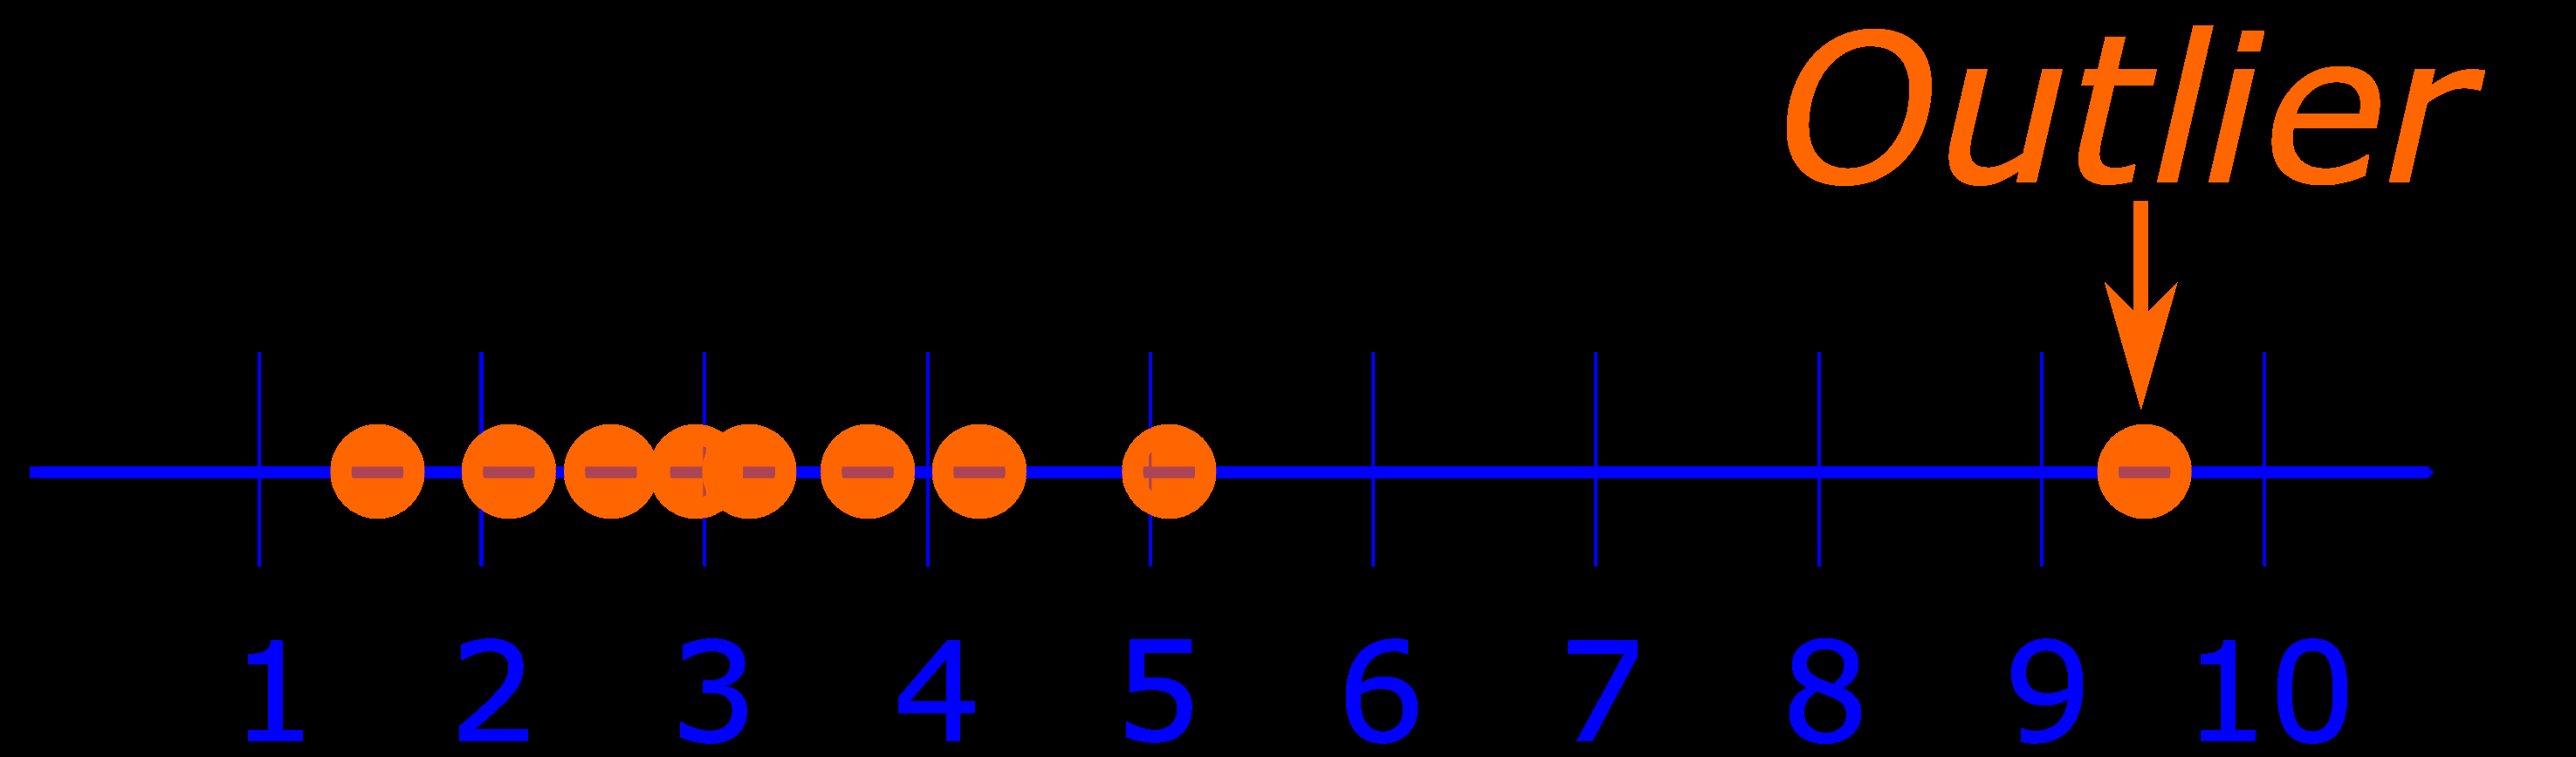
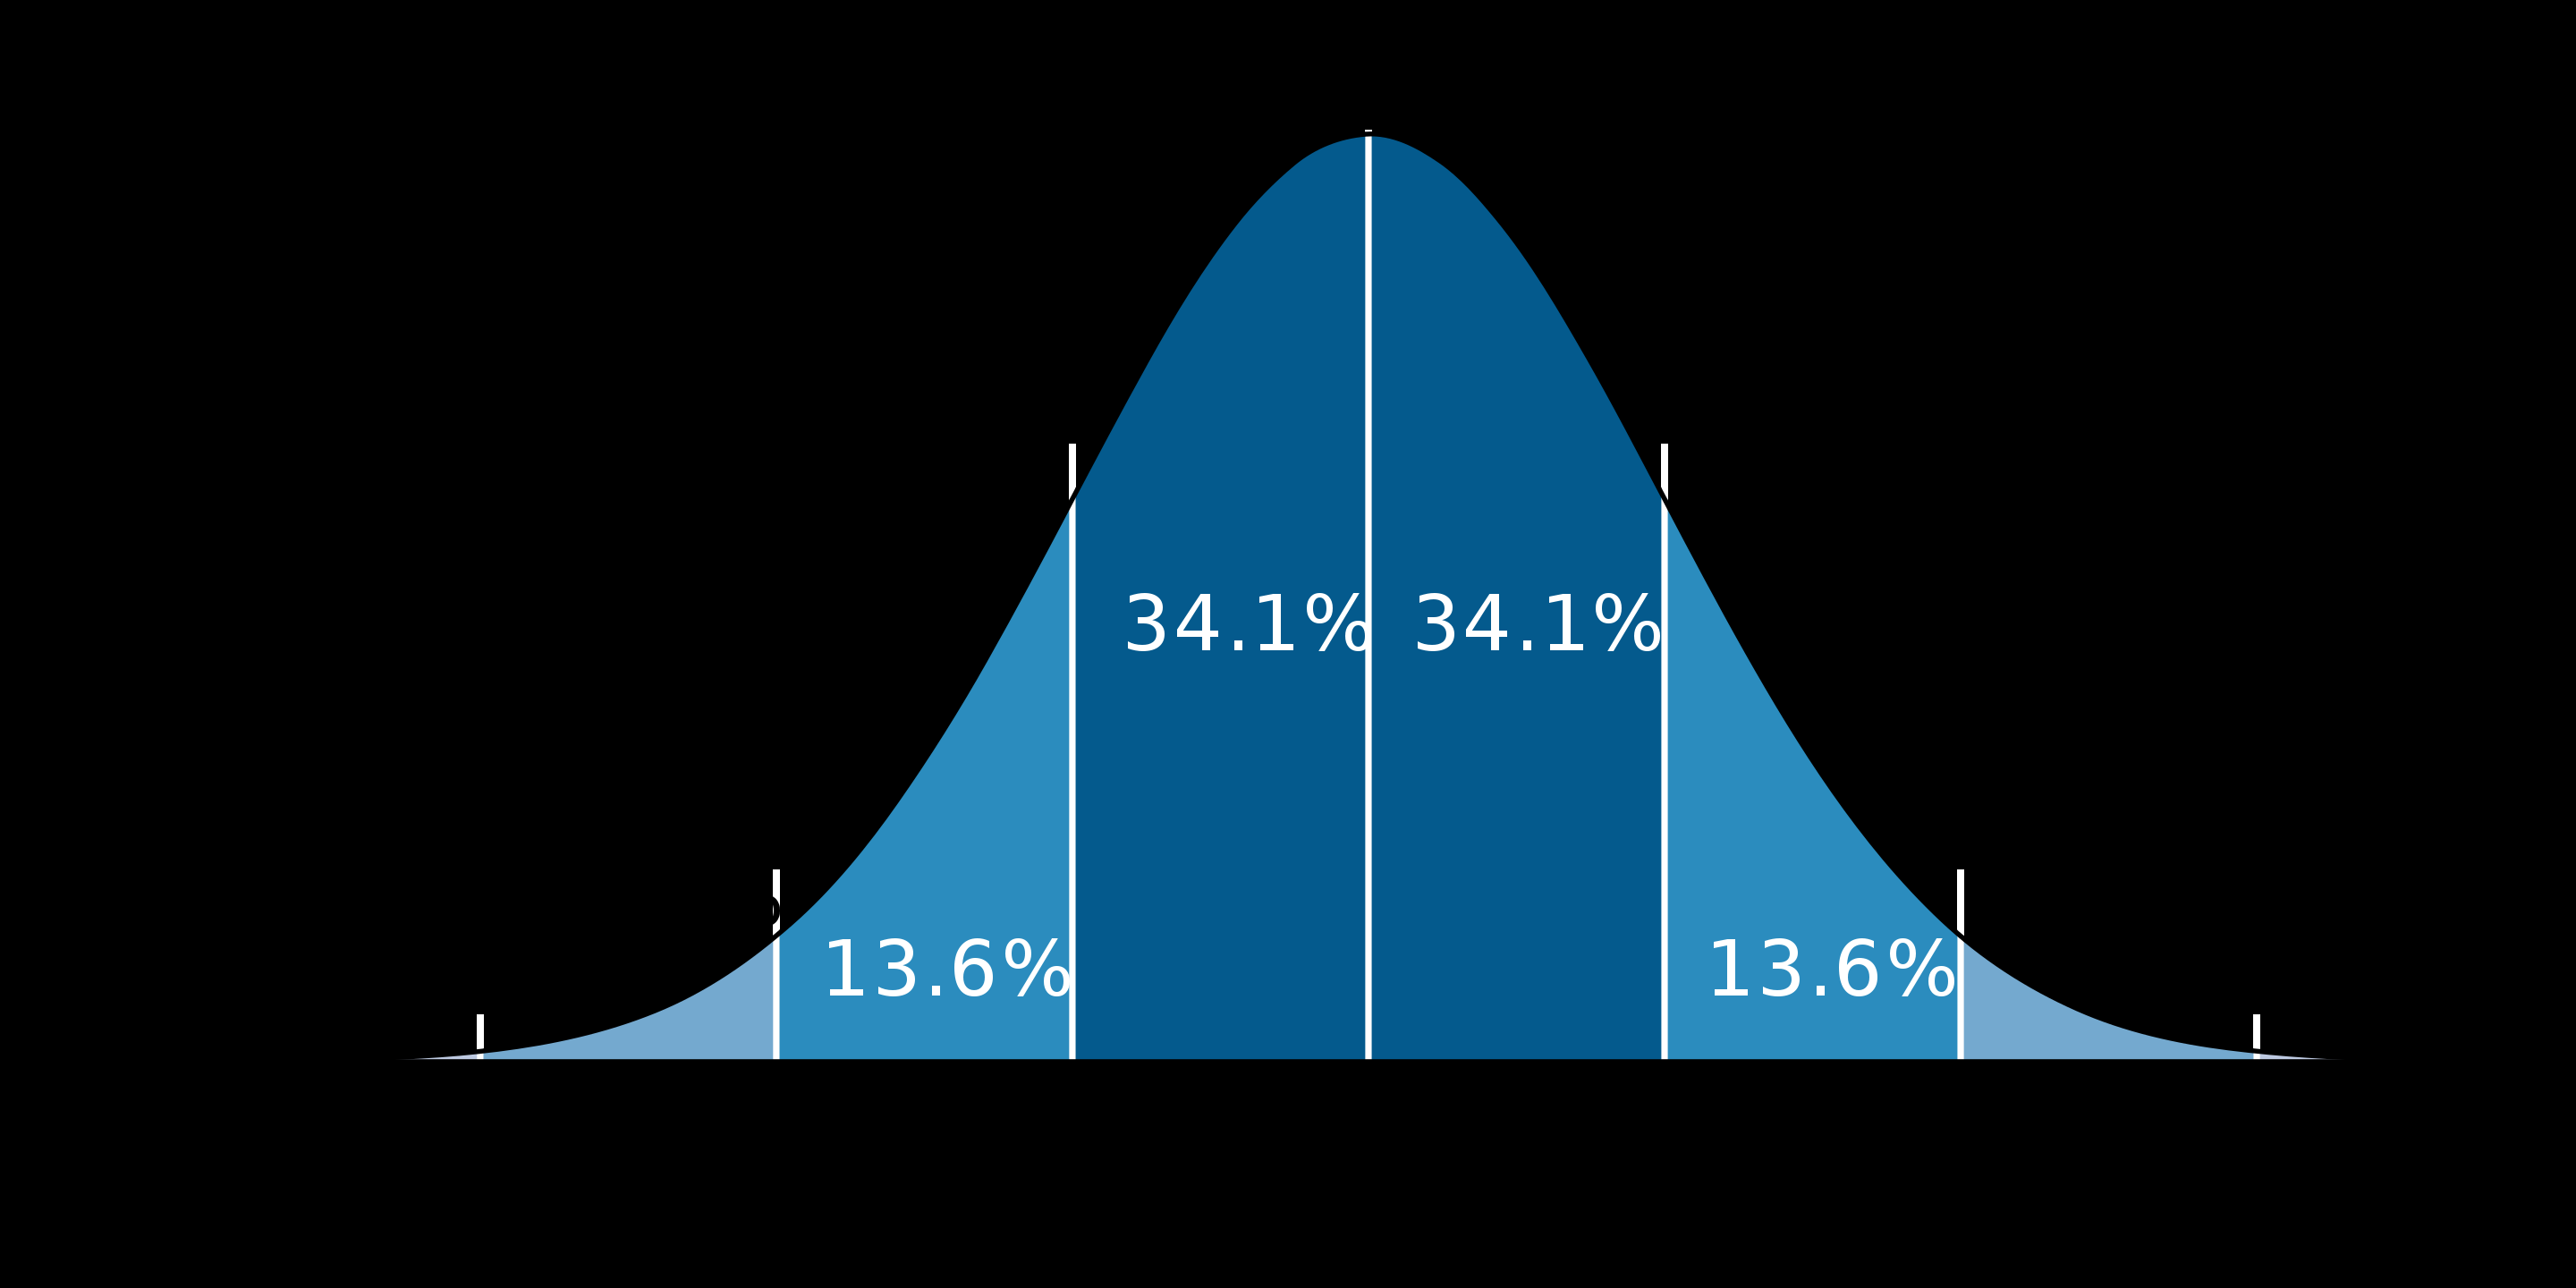

### Outliers Detection

Create a DF and function to detect outliers.


In [16]:
df_rolling = data[['simple_rtn']].rolling(20).agg(['mean','std'])
df_rolling.columns = df_rolling.columns.droplevel()
df_outliers = data.join(df_rolling)

In [17]:
def identify_outliers(row, n_sigmas=3):
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    if (x > mu + 3 * sigma) | (x < mu -3 * sigma):
        return 1
    else:
        return 0

Maintain a outliers list for further study.

In [18]:
df_outliers['outlier'] = df_outliers.apply(identify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_rtn']]
outliers.sample(5)

,simple_rtn
Date,
2013-02-05,-0.022651
2012-11-08,-0.024115
2018-02-06,-0.051164
2001-09-12,-0.088673
1991-08-19,-0.083928


### Plotting Anomaly

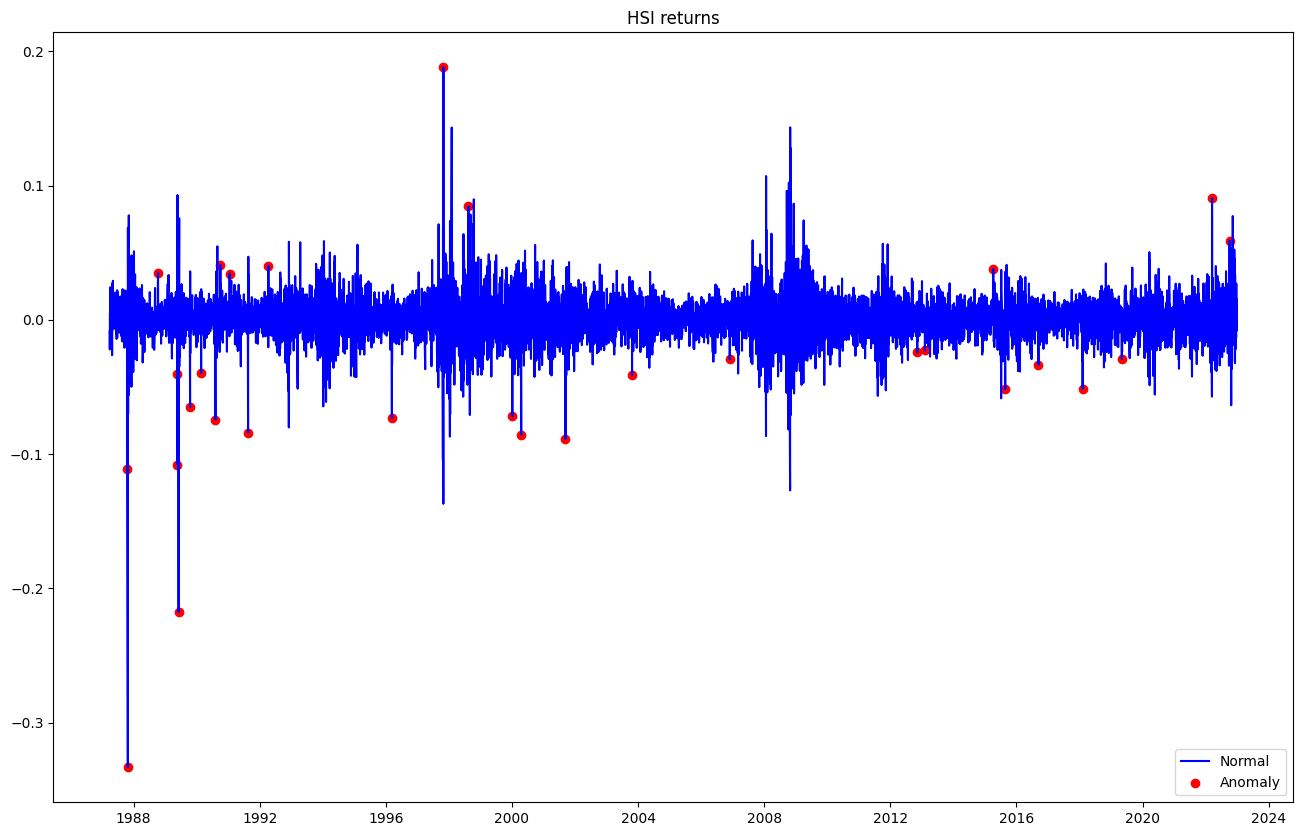

In [19]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(df_outliers.index, df_outliers.simple_rtn,
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn,
           color='red', label='Anomaly')
ax.set_title("HSI returns")
ax.legend(loc='lower right')

plt.show()

#### text

Question:
• Should we use these
outliers to build
regression model?
• Should we just erase
these outliers in DF?

#### Dealing anomaly

For serious research:
• We shall investigate those outliers event independently.
• The outlier may severely influence the majority data, so it should not keep
as sample variable to build regression model.
• It could be more important to study these anomaly data. Michael Burry the
famous hedge fund manager did it.

### Distribution and QQ plot

To analyse log return and its quantile, we may plot these two graphs.
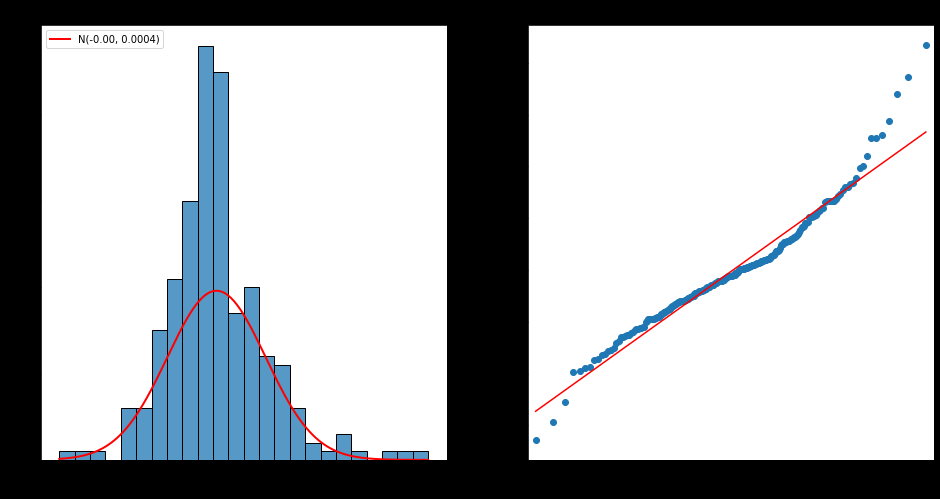

### Distribution and QQ plot in latest 250 days

To compare the log return distribution with a normal distribution, we may create a
probability density function PDF, by using log return’s mean, SD, sample size.

In [20]:
r_range = np.linspace(min(data.iloc[-250:].log_rtn), max(data.iloc[-250:].log_rtn), num=250)
mu = data.iloc[-250:].log_rtn.mean()
sigma = data.iloc[-250:].log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

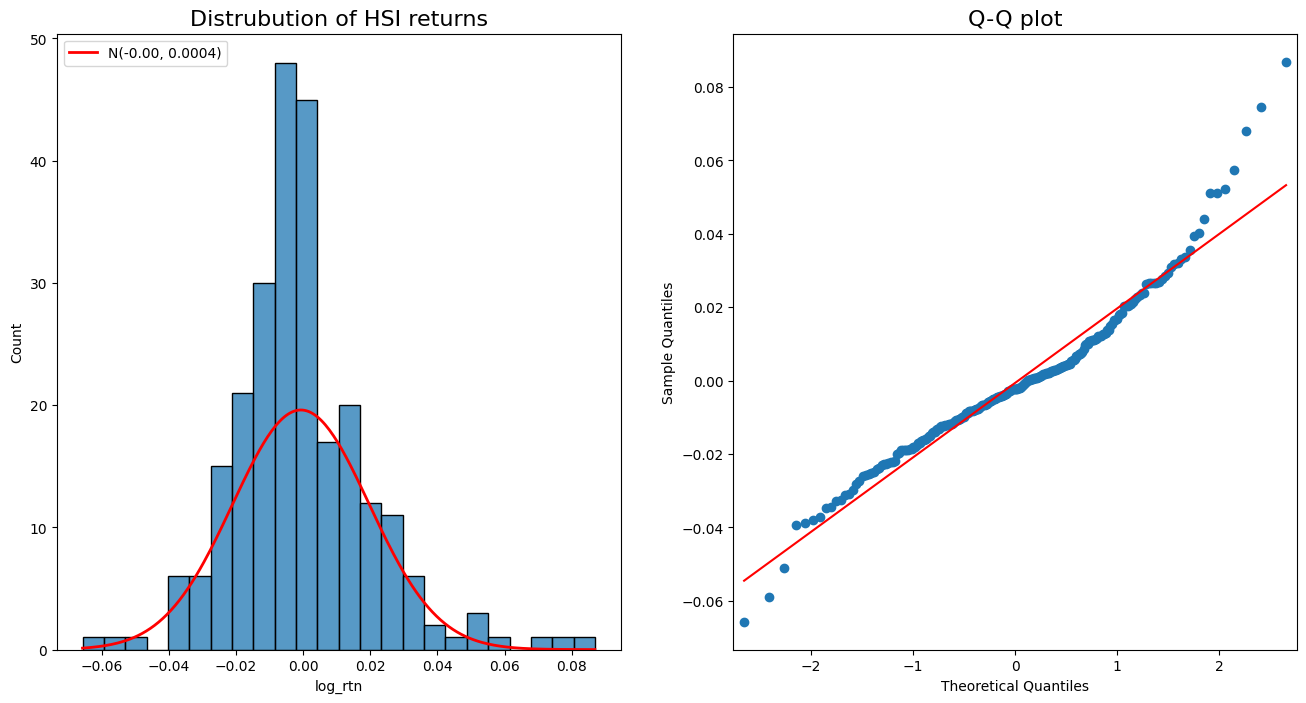

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
ax[0].set_title('Distrubution of HSI returns', fontsize=16)
sns.histplot(data=data.iloc[-250:], x='log_rtn', kde=False, ax=ax[0])
ax[0].plot(r_range, norm_pdf, 'r', lw=2, label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left')

# Q-Q plot
qq = sm.qqplot(data.iloc[-250:].log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

plt.show()

left : The red line on distribution plot is PDF
we generated.  
right : QQ plot also assess the normality of the
log return. The red line is the fit line.

### Descriptive Statistics

Generate stats figures.

In [22]:
print('---------- Descriptive Statistics ----------')
print('Range of dates:',min(data.iloc[-250:].index.date),'-', max(data.iloc[-250:].index.date))
print('Number of observations:', data.iloc[-250:].shape[0])
print(f'Mean: {data.iloc[-250:].log_rtn.mean():.4f}')
print(f'Median: {data.iloc[-250:].log_rtn.median():.4f}')
print(f'Min: {data.iloc[-250:].log_rtn.min():.4f}')
print(f'Max: {data.iloc[-250:].log_rtn.max():.4f}')
print(f'Standard Deviation: {data.iloc[-250:].log_rtn.std():.4f}')
print(f'Skewness: {data.iloc[-250:].log_rtn.skew():.4f}')
print(f'Kurtosis: {data.iloc[-250:].log_rtn.kurtosis():.4f}')

---------- Descriptive Statistics ----------
Range of dates: 2021-12-28 - 2022-12-30
Number of observations: 250
Mean: -0.0006
Median: -0.0022
Min: -0.0657
Max: 0.0869
Standard Deviation: 0.0204
Skewness: 0.7131
Kurtosis: 2.5186


### Log return vs Volatility

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



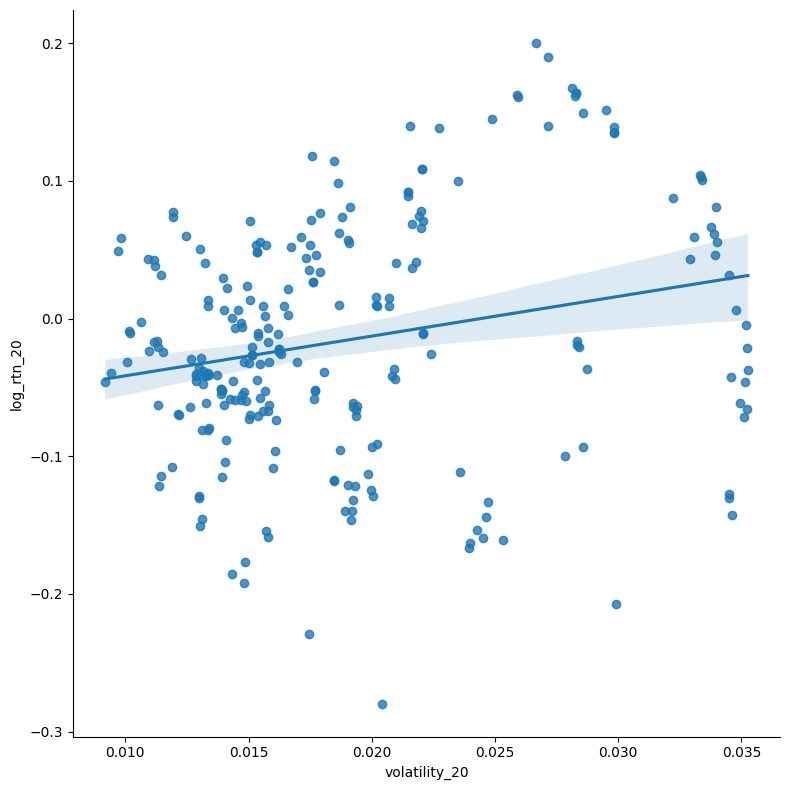

In [23]:
sns.lmplot(data=data.iloc[-250:], x="volatility_20",y="log_rtn_20", height=8)

We often heard some one said that the more
risk you involved the more you gain. To proof it
is true on an asset, it should be a clean
linear regression line with smaller standard
deviation.
R2 (correlation) should be bigger enough.

In [24]:
print("Correlation between return and volatility:",
      data.iloc[-250:].volatility_20.corr(data.iloc[-250:].log_rtn_20))

Correlation between return and volatility: 0.22993256556828845


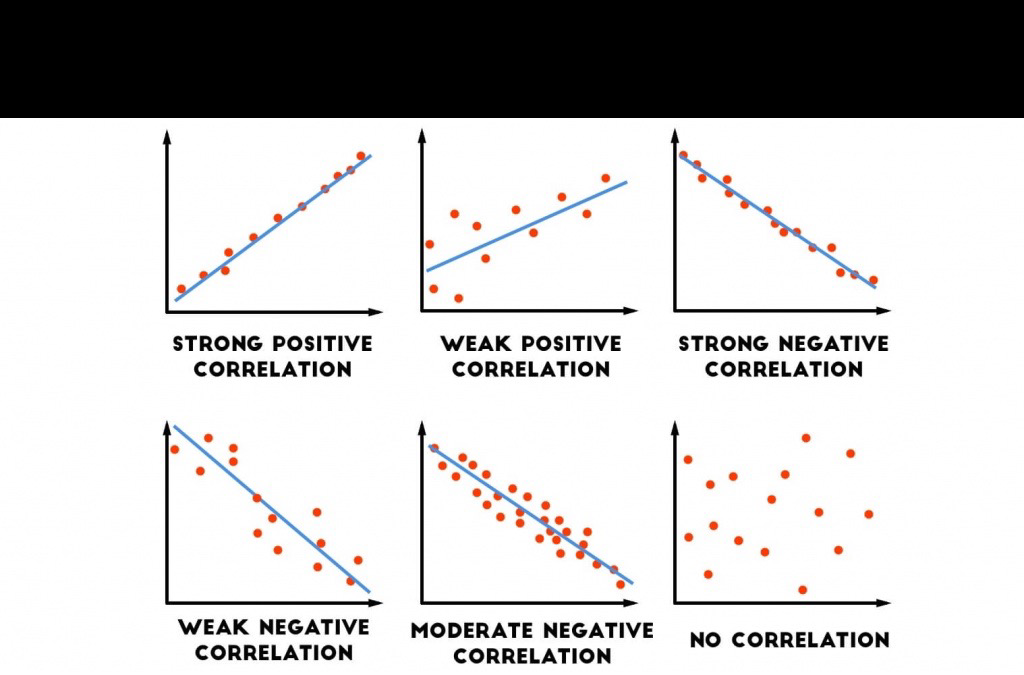

### Autocorrelation

In [25]:
import statsmodels.tsa.api as smt
N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05

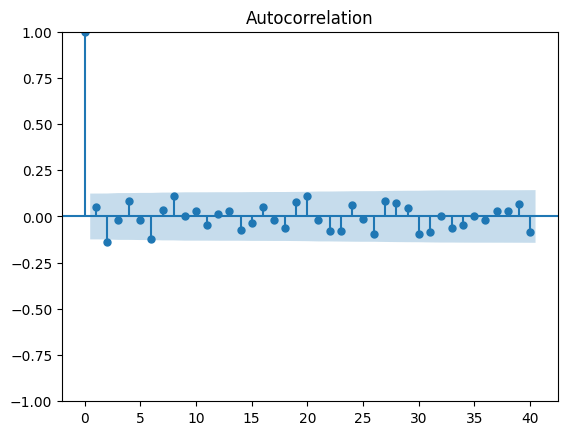

In [26]:
acf = smt.graphics.plot_acf(data.iloc[-250:].log_rtn,
                            lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)

To calculate the actual number, we can use df.series.autocorr() function in Pandas.
The number show us there are not much correlated, but barely keep positive value.

In [27]:
print("Autocorrelation of log return inlast 250-days: ",
      data.iloc[-250:].log_rtn.autocorr(lag=1))
print("Autocorrelation of log return in all years: ",
      data.log_rtn.autocorr(lag=1))

Autocorrelation of log return inlast 250-days:  0.05060587450032967
Autocorrelation of log return in all years:  0.019340156919226557


### Sharpe Ratio

$$Sharpe \ Ratio = \frac{R_p - R_f}{\sigma_p}$$
where:
$$R_p = return \ of \ portfolio $$
$$R_f = risk-free rate$$
$$\sigma_p = standard \ deviation \ of \ the \ portfolio's \ excess \ return $$


$$R_p$$ = return of portfolio 


In [28]:
hsbc = yf.download("0005.HK", start="2022-01-01", end="2023-01-01")
citic = yf.download("0998.HK", start="2022-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [29]:
def cal_sharpe(df):
    rf_rate = 0.01 
    log_ret_annual = np.log(df.Close[df.index[-1]] / df.Close[df.index[0]])
    df['log_ret_daily'] = np.log(df.Close/df.Close.shift(1))
    df=df.dropna()
    sharpe = (log_ret_annual - rf_rate) / df.log_ret_daily.std()
    return f"Sharpe Ratio: {sharpe:.4f}, Annual Log Return: {log_ret_annual:.4f}"

In [30]:
print("HSBC:", cal_sharpe(hsbc))
print("CITIC:", cal_sharpe(citic))

HSBC: Sharpe Ratio: 1.3495, Annual Log Return: 0.0356
CITIC: Sharpe Ratio: 0.7583, Annual Log Return: 0.0204


#### Sharpe Ratio Range

A Sharpe ratio less than 1 is considered bad.  
From 1 to 1.99 is considered adequate/good,  
From 2 to 2.99 is considered very good,  
and greater than 3 is considered excellent.  
However when it is greater than 3, it might also be something strange, like  
new IPO stock or suspended stock or company restructuring or asset  
liquidation, etc.